In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
from scipy.integrate import quad_vec, dblquad, tplquad
from scipy import ndimage
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from scipy.signal import welch
from scipy import stats as st
#import PyQt5
from tqdm import tqdm
import rainflow
from scipy.stats import gaussian_kde
from scipy.integrate import simpson
from sklearn.decomposition import PCA
import random
import math
from mpl_toolkits.axes_grid1 import make_axes_locatable
import torch
import gpytorch
from matplotlib import cm
from matplotlib.colors import LightSource

In [2]:
DEL= pd.read_excel(r'ML_course project.xlsx',sheet_name='damage')
Wave = pd.read_excel(r'ML_course project.xlsx',sheet_name='wave data')

In [29]:
D=[]
Hs=[]
Tp=[]
for i in range(len(Wave.iloc[:,0])):
    Hs.append(Wave.iloc[i,0])
    Tp.append(Wave.iloc[i,1])
    index=Wave.iloc[i,0]/0.05*201+(Wave.iloc[i,1]-2)/0.05
    D.append(DEL.iloc[int(index),2])

In [13]:
print('exact solution='+str(np.mean(D)))

exact solution=1.0243125490765762e-05


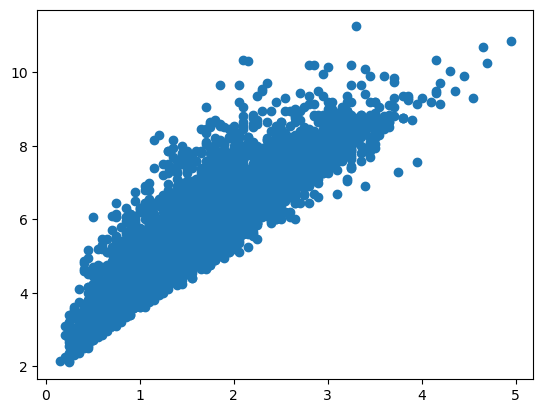

In [14]:
plt.scatter(Hs,Tp)

In [18]:
X = np.array([list(Hs),list(Tp)]).T
model = PCA(n_components=2)
pca = model.fit(X)
X_save = model.transform(X)

[-1.06097627 -0.00794805]
24911 0
[[1.   4.15]
 [1.85 6.1 ]]
[-1.12793962 -0.09472143]
24911 1
[[1.05 4.05]
 [0.95 4.25]
 [2.05 6.15]
 [1.65 6.05]]
[-1.0910004  -0.12129455]
24911 2
[[1.1  4.1 ]
 [0.95 4.05]
 [0.95 4.35]
 [2.15 6.25]
 [1.8  5.95]
 [1.6  6.15]]
[-1.05567122 -0.13761729]
24911 3
[[1.1  4.1 ]
 [1.   4.  ]
 [0.95 4.1 ]
 [0.95 4.4 ]
 [2.2  6.35]
 [1.85 6.  ]
 [1.75 5.95]
 [1.6  6.2 ]]
[-1.02214315 -0.14938099]
24911 4
[[1.15 4.15]
 [1.   4.  ]
 [0.95 4.05]
 [0.95 4.2 ]
 [0.95 4.45]
 [2.3  6.4 ]
 [1.9  6.  ]
 [1.8  5.95]
 [1.7  5.95]
 [1.6  6.25]]
[-1.37051944 -0.01743148]
24911 0
[[0.9  3.9 ]
 [1.35 5.  ]
 [2.05 6.55]]
[-1.41226415 -0.09285854]
24911 1
[[0.95 3.8 ]
 [0.85 3.95]
 [1.45 4.95]
 [1.25 5.05]
 [2.25 6.6 ]
 [1.8  6.45]]
[-1.37627848 -0.11613452]
24911 2
[[0.95 3.85]
 [0.85 3.8 ]
 [0.8  4.  ]
 [1.5  4.95]
 [1.35 5.  ]
 [1.2  5.1 ]
 [2.35 6.7 ]
 [2.   6.4 ]
 [1.75 6.5 ]]
[-1.35460755 -0.1302018 ]
24911 3
[[1.   3.85]
 [0.9  3.8 ]
 [0.85 3.85]
 [0.8  4.05]
 [1.5  4.9

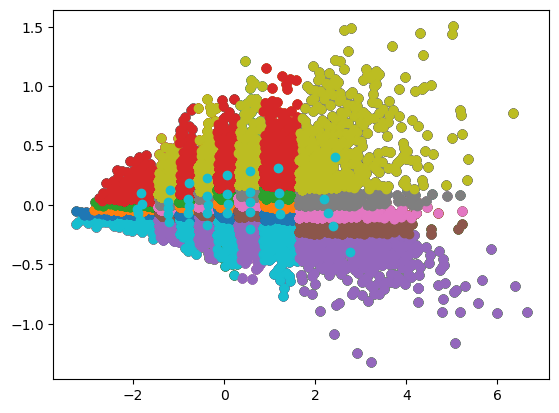

In [89]:
ymean=[]
xmean=[]
for m in range(7):
    for n in range(5):
        j=0
        gridx=2+m
        gridy=1+n
        H=X_save[:,0]
        T=X_save[:,1]
        D2=D
        H,T,D2= zip(*sorted(zip(H,T,D2)))
        RH=[]
        RT=[]
        ReD=[]
        #print(T,D2)
        for i in range(gridx):
            CH=H[int(np.round(0+i*len(H)/gridx,0)):int(np.round(len(H)/gridx+i*len(H)/gridx,0))]
            CT=T[int(np.round(0+i*len(H)/gridx,0)):int(np.round(len(H)/gridx+i*len(H)/gridx,0))]
            CD=D[int(np.round(0+i*len(H)/gridx,0)):int(np.round(len(H)/gridx+i*len(H)/gridx,0))]
            CT,CH,CD= zip(*sorted(zip(CT,CH,CD)))
            for j in range(gridy):
                DH=CH[int(np.round(0+j*len(CH)/gridy,0)):int(np.round(len(CH)/gridy+j*len(CH)/gridy,0))]
                DT=CT[int(np.round(0+j*len(CH)/gridy,0)):int(np.round(len(CH)/gridy+j*len(CH)/gridy,0))]
                DD=CD[int(np.round(0+j*len(CH)/gridy,0)):int(np.round(len(CH)/gridy+j*len(CH)/gridy,0))]
                plt.scatter(DH,DT)
                ReD.append(np.mean(DD))
                RH.append(np.mean(DH))
                RT.append(np.mean(DT))

        R=np.array([list(RH),list(RT)]).T
        print(R[0])
        SS=(model.inverse_transform(R))
        print(len(X_save[:,0]),j)
        Re=np.round(SS * 2,1) / 2
        print(Re)
        plt.scatter(R[:,0],R[:,1])
        PCAD=[]
        for k in range(gridx*gridy):
            index=Re[k,0]/0.05*201+(Re[k,1]-2)/0.05
            PCAD.append(DEL.iloc[int(index),2])
        ymean.append(np.mean(PCAD))
        xmean.append(gridx*gridy)

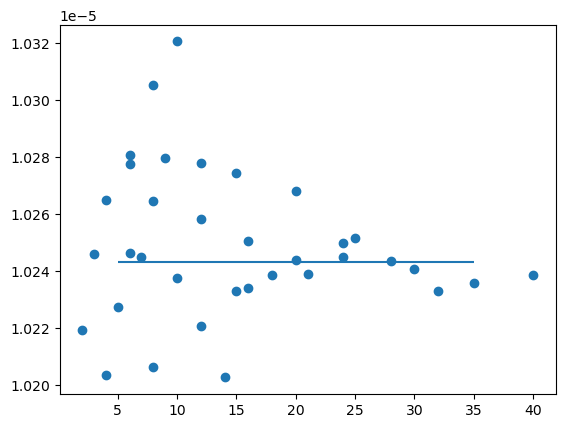

In [92]:
plt.scatter(xmean,ymean)
plt.hlines(1.0243125490765762e-05,5,35)

In [75]:
print(PCAD,ReD)
print((np.array(PCAD)-np.array(ReD))/np.array(ReD))

[9.601100642584627e-06, 9.54232379374949e-06, 9.543040458199228e-06, 9.570735933802146e-06, 9.483102490289924e-06, 9.458484018101669e-06, 9.63571310625905e-06, 9.584575643012917e-06, 9.553772370377394e-06, 1.0524850161909543e-05, 1.0263126482667616e-05, 1.0054972500272602e-05, 1.3458817626972577e-05, 1.2131042346759305e-05, 1.1090227483220658e-05] [9.547342038520843e-06, 9.54072941752475e-06, 9.546624542388315e-06, 9.547050984534769e-06, 9.556993850212815e-06, 9.547111682575613e-06, 9.633467209205146e-06, 9.64086089740958e-06, 9.632535418925737e-06, 1.0231640484395439e-05, 1.0256697493614692e-05, 1.0233722420910158e-05, 1.2607109717075418e-05, 1.2044681322187541e-05, 1.2080571715311147e-05]
[ 0.00563074  0.00016711 -0.00037543  0.00248087 -0.00773165 -0.00928319
  0.00023313 -0.0058382  -0.00817677  0.02865715  0.00062681 -0.01746675
  0.06755775  0.00717005 -0.08197826]


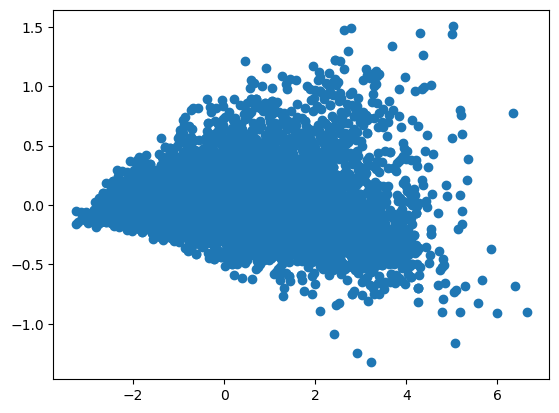

In [21]:
plt.scatter(X_save[:,0],X_save[:,1])